Primero importaremos las librerias necesarias para comenzar a trabajar con el EDA.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Ahora procederemos a importar nuestro dataset. Tenemos un csv.

In [5]:
df = pd.read_csv("F:/Bootcamp/EDA_PROJECT_BREAK/ufc-fighters-statistics.csv")

In [6]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


ahora iniciaremos la busqueda de nulos

In [11]:
df.isnull().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

los nulos de nickname son irrelevantes asi que eliminaremos la columna

In [12]:
del(df["nickname"])

ahora vamos a por los nulos en peso y vamos a eliminar a los luchadores con ese nulo ya que es solo un 2% de las muestras

In [15]:
df = df.dropna(subset=['weight_in_kg'])
print(df['weight_in_kg'].isnull().sum())

0


ahora vamos a rellenar los nulos de altura estos tienen bastante que ver con el alcanze y viceabersa tambien a asi que calcularemos los nulos usando la mediana de altura respectiva a cada alcance y igual para los nulos del otro lado

In [16]:

media_alcance_por_altura = df.groupby('height_cm')['reach_in_cm'].transform('mean')


df['reach_in_cm'] = df['reach_in_cm'].fillna(media_alcance_por_altura)


print(df['reach_in_cm'].isnull().sum())

222


In [17]:
df = df.dropna(subset=["reach_in_cm"])
print(df['reach_in_cm'].isnull().sum())

0


In [18]:
print(df['height_cm'].isnull().sum())

1


In [19]:
df = df.dropna(subset=["height_cm"])

Ahora faltan los de año de nacimiento y stance estas columnas las borraremos ya que no sirven a nuestro analisis.

In [20]:
del(df["stance"])
del(df["date_of_birth"])

Ahora crearemos 3 columnas nuevas 1. que sera el (IMC) el cual nos permite ver la composicion corporal del luchador. 2 (Style) la cual nos dira que estilo usa el luchador si es Grappler(luchador de suelo) o Striker(luchador de golpeo) uno en funcion de los derribos y sumiiones otro en funcion de la precision de los golpes. 3 (total_vistories) que sera las victorias menos las derrotas.

In [29]:
df['average_submissions_attempted_per_15_minutes'].value_counts()

average_submissions_attempted_per_15_minutes
0.0    2031
0.3     142
0.5     139
0.4     123
1.0     120
       ... 
6.3       1
6.9       1
6.5       1
6.0       1
5.2       1
Name: count, Length: 97, dtype: int64

In [37]:

median_striking_accuracy = df['significant_strikes_landed_per_minute'].median()
median_submissions_attempted = df['average_submissions_attempted_per_15_minutes'].median()


def assign_fighter_style(row):
    if row['significant_strikes_landed_per_minute'] > median_striking_accuracy:
        return 'Striker'
    elif row['average_submissions_attempted_per_15_minutes'] > median_submissions_attempted:
        return 'Grappler'
    else:
        return 'Mixto'

df['style'] = df.apply(assign_fighter_style, axis=1)


print(df["style"].value_counts())

style
Striker     1895
Mixto       1160
Grappler     746
Name: count, dtype: int64


In [38]:
df['IMC'] = df['weight_in_kg'] / ((df['height_cm'] / 100) ** 2)
df['IMC'].value_counts()

IMC
23.055698    122
22.240963    119
22.890300    114
24.391988    106
23.709728    102
            ... 
25.970460      1
52.213935      1
54.091589      1
34.689907      1
34.701708      1
Name: count, Length: 401, dtype: int64

In [39]:
df['TOTAL_VICTORIES'] = df['wins'] - df['losses']
df['TOTAL_VICTORIES'].value_counts()

TOTAL_VICTORIES
 6      316
 5      298
 4      289
 8      280
 7      275
       ... 
 47       1
-25       1
 53       1
-14       1
 200      1
Name: count, Length: 63, dtype: int64

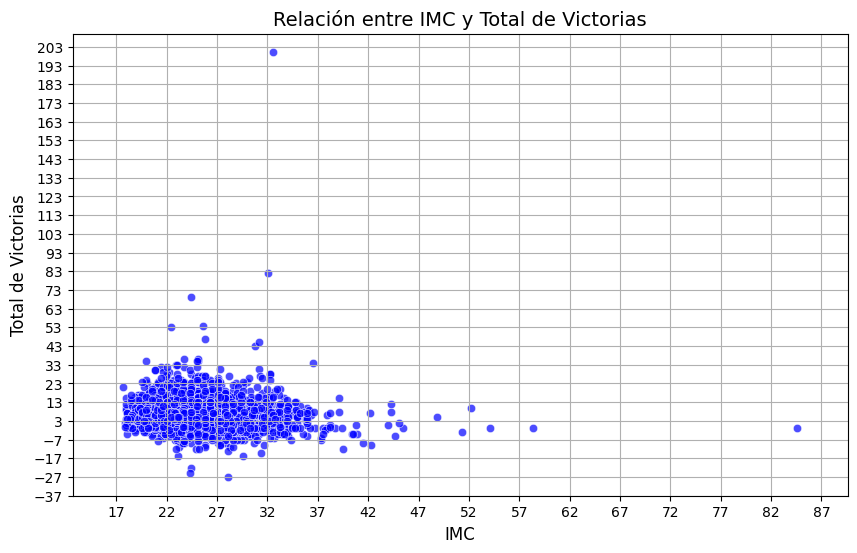

In [40]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IMC', y='TOTAL_VICTORIES', color='blue', alpha=0.7)


plt.title('Relación entre IMC y Total de Victorias', fontsize=14)
plt.xlabel('IMC', fontsize=12)
plt.ylabel('Total de Victorias', fontsize=12)


plt.xticks(range(int(df['IMC'].min()) - 5, int(df['IMC'].max()) + 5, 5))  # Rango del eje X (IMC) de 5 en 5
plt.yticks(range(int(df['TOTAL_VICTORIES'].min()) - 10, int(df['TOTAL_VICTORIES'].max()) + 10, 10))  # Rango del eje Y (Victorias) de 10 en 10


plt.xlim(df['IMC'].min() - 5, df['IMC'].max() + 5)
plt.ylim(df['TOTAL_VICTORIES'].min() - 10, df['TOTAL_VICTORIES'].max() + 10)


plt.grid(True)  # Agregamos una cuadrícula para facilitar la lectura
plt.show()

vemos que la mayoria se agrupan entre el 20 y 30 de imc 

C:\Users\samas\AppData\Local\Temp\ipykernel_19112\3450291275.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agrupada = df.groupby('IMC_range')['TOTAL_VICTORIES'].sum().reset_index()
C:\Users\samas\AppData\Local\Temp\ipykernel_19112\3450291275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_agrupada, x='IMC_range', y='TOTAL_VICTORIES', palette='viridis')


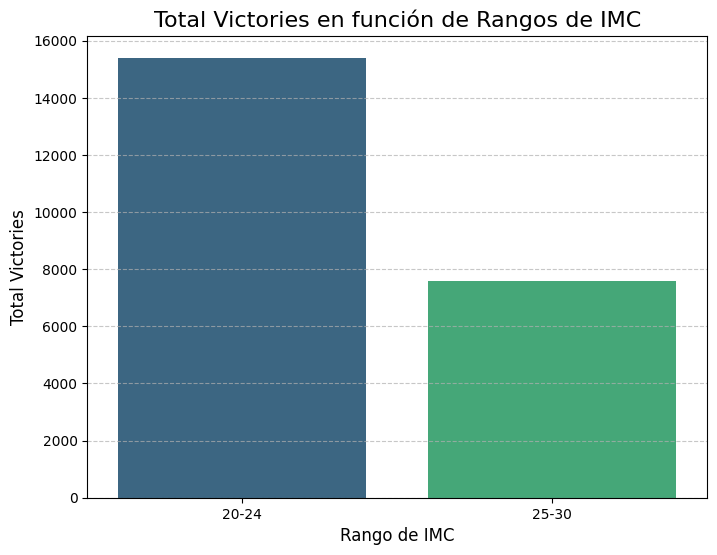

In [41]:
df['IMC_range'] = pd.cut(
    df['IMC'],
    bins=[20, 24, 30],  # Definir los límites de los rangos (20-24 y 25-30)
    labels=['20-24', '25-30'],
    right=False  # Excluir el límite superior del rango
)

# Agrupar los datos por rango de IMC y calcular la suma de victorias totales
data_agrupada = df.groupby('IMC_range')['TOTAL_VICTORIES'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=data_agrupada, x='IMC_range', y='TOTAL_VICTORIES', palette='viridis')

# Configurar títulos y etiquetas
plt.title('Total Victories en función de Rangos de IMC', fontsize=16)
plt.xlabel('Rango de IMC', fontsize=12)
plt.ylabel('Total Victories', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

La mayoria de victorias de se centran en el rango de 20 - 24 de IMC lo cual indica que efectivamente la altura es un factor importante pero no decisivo.

C:\Users\samas\AppData\Local\Temp\ipykernel_19112\1108866660.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='style', y='TOTAL_VICTORIES', estimator=sum, ci=None, palette='viridis')
C:\Users\samas\AppData\Local\Temp\ipykernel_19112\1108866660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='style', y='TOTAL_VICTORIES', estimator=sum, ci=None, palette='viridis')


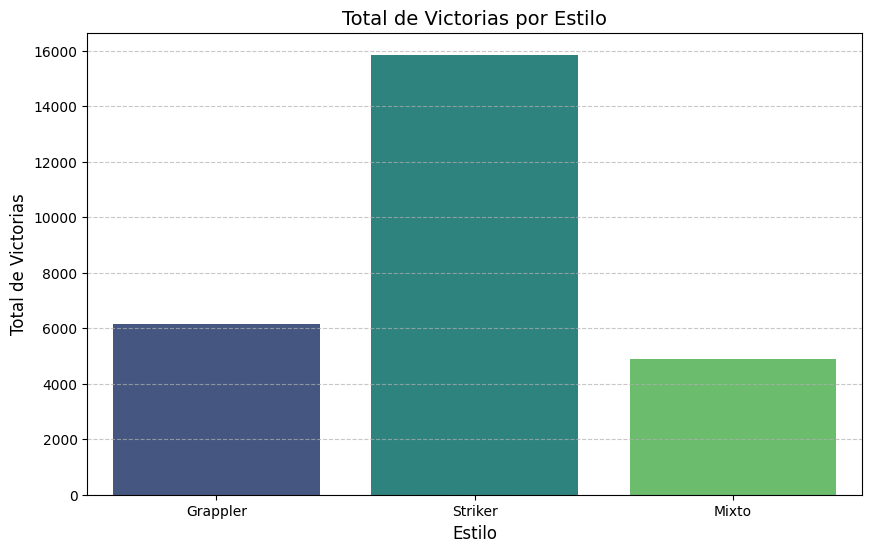

In [42]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='style', y='TOTAL_VICTORIES', estimator=sum, ci=None, palette='viridis')


plt.title('Total de Victorias por Estilo', fontsize=14)
plt.xlabel('Estilo', fontsize=12)
plt.ylabel('Total de Victorias', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula para facilitar la lectura
plt.show()

Con esto podemos ver que una buena base de Striking puede ser muy util para ganar peleas

C:\Users\samas\AppData\Local\Temp\ipykernel_19112\1957566136.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x='height_cm', y='TOTAL_VICTORIES', estimator=sum, ci=None, palette='coolwarm')
C:\Users\samas\AppData\Local\Temp\ipykernel_19112\1957566136.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='height_cm', y='TOTAL_VICTORIES', estimator=sum, ci=None, palette='coolwarm')


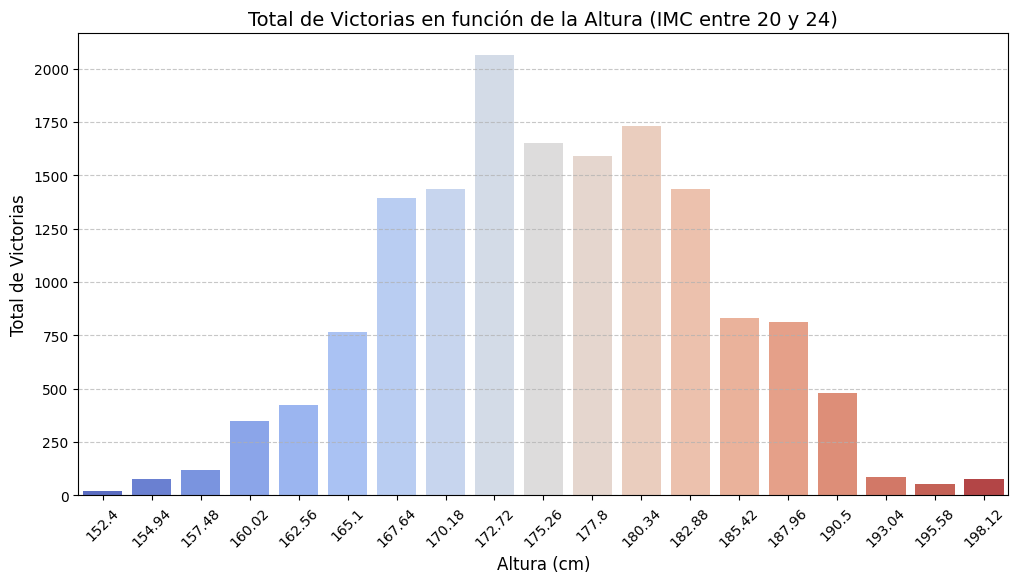

In [43]:

filtered_df = df[(df['IMC'] >= 20) & (df['IMC'] <= 24)]


plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='height_cm', y='TOTAL_VICTORIES', estimator=sum, ci=None, palette='coolwarm')


plt.title('Total de Victorias en función de la Altura (IMC entre 20 y 24)', fontsize=14)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Total de Victorias', fontsize=12)


plt.xticks(rotation=45)  # Rotamos las etiquetas del eje X para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula horizontal
plt.show()

Vemos que la altura con mas victorias en el IMC de los altos es entre 170 y 180 centimetros. Esto quiere decir que es especialmente until ser alto en las categorias de peso ligero y superligero.